# Modelli Lineari

## _Apprendimento Automatico_ | LM in *Data Science*

    

da doc. Scikit-learn + Python Machine Learning - Code Examples | Ch. 4

In [1]:
from IPython.display import Image
%matplotlib inline

## L'API `Estimator` in scikit-learn

**preprocessing**

<img src=https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch04/images/04_01.png width=500/> 

**apprendimento / predizione**

<img src=https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch04/images/04_02.png width=400/> 

## Esempi sul dataset Iris [interno]

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('in y:', np.bincount(y))
print('in y_train:', np.bincount(y_train))
print('in y_test:', np.bincount(y_test))

in y: [50 50 50]
in y_train: [35 35 35]
in y_test: [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Esempi | Training di Classificatori

[`Nearest Centroid`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html#sklearn.neighbors.NearestCentroid)

**NB** in sklearn nella sezione `sklearn.neighbors`

In [5]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

nc = NearestCentroid()
nc.fit(X_train_std, y_train)

y_pred = nc.predict(X_test_std)
print('Errori: %d/%d' % ((y_test!=y_pred).sum(), y_test.shape[0])) 
                                # np.count_nonzero((y_test!=y_pred))
acc = accuracy_score(y_test,y_pred)
print(F'Accuratezza: {acc*100:.2f}%')

Errori: 8/45
Accuratezza: 82.22%


#### Regioni di decisione per coppie di feature

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_decision_regions(X, y, clf):
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.05
    figure(figsize=(8, 6), dpi=96)   

    # per coppie di feature
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
        XX = X[:,pair]              
        # train
        clf.fit(XX, y)
        # traccia il confine di decisione
        plt.subplot(2, 3, pairidx + 1)
        x_min, x_max = XX[:, 0].min() - 1, XX[:, 0].max() + 1
        y_min, y_max = XX[:, 1].min() - 1, XX[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # traccia i punti di training
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(XX[idx, 0],XX[idx, 1], c=color, label=iris.target_names[i],
                        edgecolor="black",s=15)

    _ = plt.axis("tight")

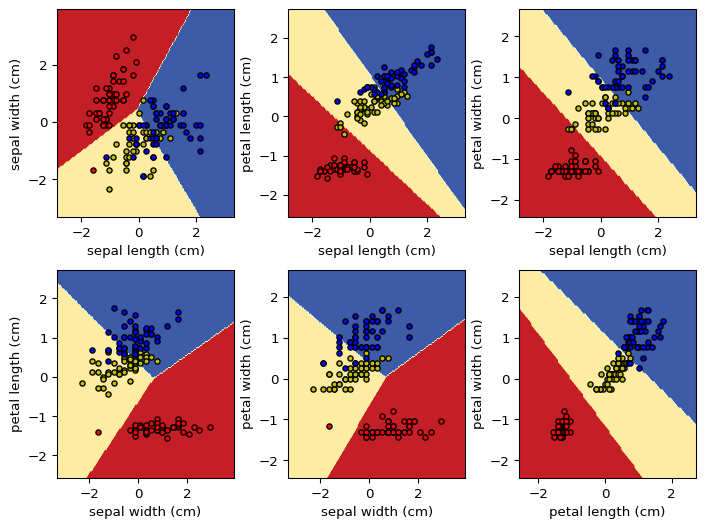

In [7]:
from sklearn.neighbors import NearestCentroid

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,clf=NearestCentroid())

#### alternativa con `DecisionBoundaryDisplay`

dalla [doc](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) di sklearn

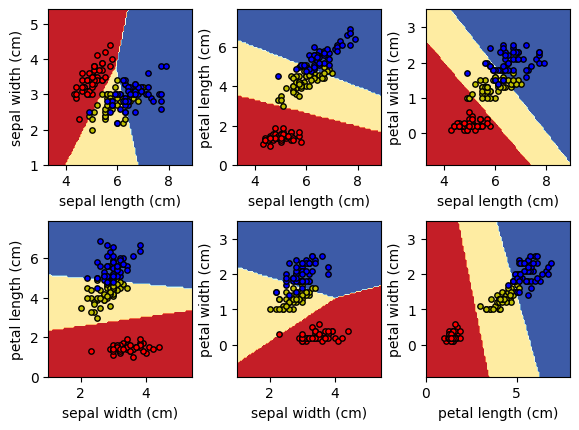

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # solo coppie di feature
    X = iris.data[:, pair]
    y = iris.target

    # Training
    clf = NearestCentroid().fit(X, y)

    # Plot del confine di decisione 
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", ax=ax, 
                                           xlabel=iris.feature_names[pair[0]],
                                           ylabel=iris.feature_names[pair[1]],
                                           cmap=plt.cm.RdYlBu)
    # Plot degli es. di training
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0],X[idx, 1],
                    c=color,label=iris.target_names[i],
                    edgecolor="black",s=15,)

#plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

[`LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)

y_pred = lda.predict(X_test_std)
print('Misclassificati: %d' % (y_test != y_pred).sum())
print('Accuratezza: %.3f' % accuracy_score(y_test, y_pred))

Misclassificati: 1
Accuratezza: 0.978


[`QuadraticDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_std, y_train)

y_pred = qda.predict(X_test_std)
print('Misclassificati: %d' % (y_test != y_pred).sum())
print('Accuratezza: %.3f' % accuracy_score(y_test, y_pred))

Misclassificati: 1
Accuratezza: 0.978


**QDA e confini quadratici**

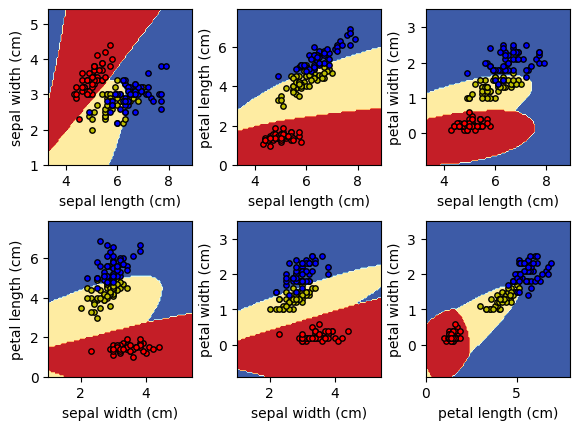

In [11]:
from sklearn.inspection import DecisionBoundaryDisplay

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # solo coppie di feature
    X = iris.data[:, pair]
    y = iris.target

    # Training
    clf = QuadraticDiscriminantAnalysis().fit(X, y)

    # Plot del confine di decisione 
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", ax=ax, 
                                           xlabel=iris.feature_names[pair[0]],
                                           ylabel=iris.feature_names[pair[1]],
                                           cmap=plt.cm.RdYlBu)
    # Plot degli es. di training
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0],X[idx, 1],
                    c=color,label=iris.target_names[i],
                    edgecolor="black",s=15,)

#plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Classificatori Naive Bayes: [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [12]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()

nbc.fit(X_train_std, y_train)

y_pred = nbc.predict(X_test_std)
y_probab = nbc.predict_proba(X_test_std)

print('Esempi Misclassificati: %d' % (y_test != y_pred).sum())
print('Accuratezza: %.3f' % nbc.score(X_test_std, y_test)) 
                            # score di default per classificatori

Esempi Misclassificati: 4
Accuratezza: 0.911


Classificazione predetta e probabilità a posteriori $P(C_i|\mathbf{x})\quad \forall i=0,1,2$  <span style="float:right;">(primi `10` esempi)</span>

In [13]:
print('%2s %10s %30s' % ('#', 'classe', 'P(C[i]|x[t])') )
for t in range(len(y_pred)):
    print('%2d %10s %30s' % (t, iris.target_names[y_pred[t]], y_probab[t]) )

 #     classe                   P(C[i]|x[t])
 0  virginica [8.13274174e-287 4.09973988e-007 9.99999590e-001]
 1 versicolor [7.20331813e-132 9.95507061e-001 4.49293924e-003]
 2 versicolor [6.90267643e-164 8.47176496e-001 1.52823504e-001]
 3 versicolor [2.97743289e-143 6.67959840e-001 3.32040160e-001]
 4  virginica [4.84341397e-169 1.03641369e-001 8.96358631e-001]
 5  virginica [4.28927982e-275 6.04394482e-010 9.99999999e-001]
 6 versicolor [1.53145136e-87 9.99992784e-01 7.21632701e-06]
 7 versicolor [1.12156641e-73 9.99999144e-01 8.55808769e-07]
 8     setosa [1.00000000e+00 3.32169214e-16 1.65386323e-24]
 9  virginica [4.08267916e-230 8.08783918e-008 9.99999919e-001]
10     setosa [1.00000000e+00 5.48622894e-20 1.22981621e-26]
11     setosa [1.00000000e+00 6.64393317e-19 8.81366457e-28]
12  virginica [2.79927058e-239 3.37871650e-004 9.99662128e-001]
13  virginica [6.74125072e-214 1.31110876e-003 9.98688891e-001]
14     setosa [1.00000000e+00 1.01131767e-18 4.58206717e-27]
15  virginica

Altri Classificatori Naive Bayes 

|classe| classificatore NB |
|:-|:-|
|`naive_bayes.BernoulliNB(*[, alpha, ...])` | per modelli Bernoulli
|`naive_bayes.CategoricalNB(*[, alpha, ...])` | per feature categoriche
|`naive_bayes.ComplementNB(*[, alpha, ...])` | si veda Rennie et al. (2003)
|`naive_bayes.GaussianNB(*[, priors, ...])` | per modelli Gaussiani
|`naive_bayes.MultinomialNB(*[, alpha, ...])` | per modelli multinomiali 

**Guida utente**: per maggiori dettagli, si veda la sezione [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) 

### Esercizi

testare altri classificatori in `sklearn.linear_model` (anche di tipo discriminativo) su <u>altri</u> dataset
- [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) 
- [`Logisticregression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [`Perceptron`]()

[`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

In [14]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

rc = RidgeClassifier(alpha=.01, random_state=1)
rc.fit(X_train_std, y_train)

y_pred = rc.predict(X_test_std)
print('Misclassificati: %d' % (y_test != y_pred).sum())
print('Accuratezza: %.3f' % accuracy_score(y_test, y_pred))

Misclassificati: 12
Accuratezza: 0.733


[`Perceptron`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [15]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassificati: %d' % (y_test != y_pred).sum())
print('Accuratezza: %.3f' % accuracy_score(y_test, y_pred))

Misclassificati: 9
Accuratezza: 0.800


## Validazione Incrociata

Diverse prestazioni per un particolare **split** Training / Test e per un particolare scelta di valori per gli **iperparametri**

Una valutazione credibile dovrebbe mediare su diverse ripetizioni al variare di tutti questi fattori
   
- la ripetizione riduce l'impatto della casualità (cfr. libri di testo)


### Uso di `cross_val_score` e metriche di valutazione delle prestazioni

cfr. [doc](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) di sklearn

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import  load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

clf = NearestCentroid()
scores = cross_val_score(clf, X, y, cv=5) # deault accuratezza
print(scores)
print(scores.mean(),'+|-',scores.std())

[0.83333333 0.86842105 0.9122807  0.93859649 0.90265487]
0.8910572892408011 +|- 0.03657695196042866


In [17]:
from sklearn import metrics

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print(scores)
print(scores.mean(),'+|-',scores.std())

[0.79920274 0.84887318 0.90131579 0.93220627 0.89165868]
0.8746513314510331 +|- 0.04619484085840267


uso di `ShuffleSplit`

In [18]:
from sklearn.model_selection import ShuffleSplit

n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)
print(scores.mean(),'+|-',scores.std())

[0.89473684 0.87134503 0.87134503 0.85964912 0.88888889]
0.8771929824561404 +|- 0.012812223567372296


**Esercizi**

- provare la funzione con altri classificatori / metriche (score)

## Debugging con *Curve di Apprendimento*


### Diagnosi di Problemi di Bias e Varianza mediante Curve di Apprendimento

_underfitting_ e _overfitting_

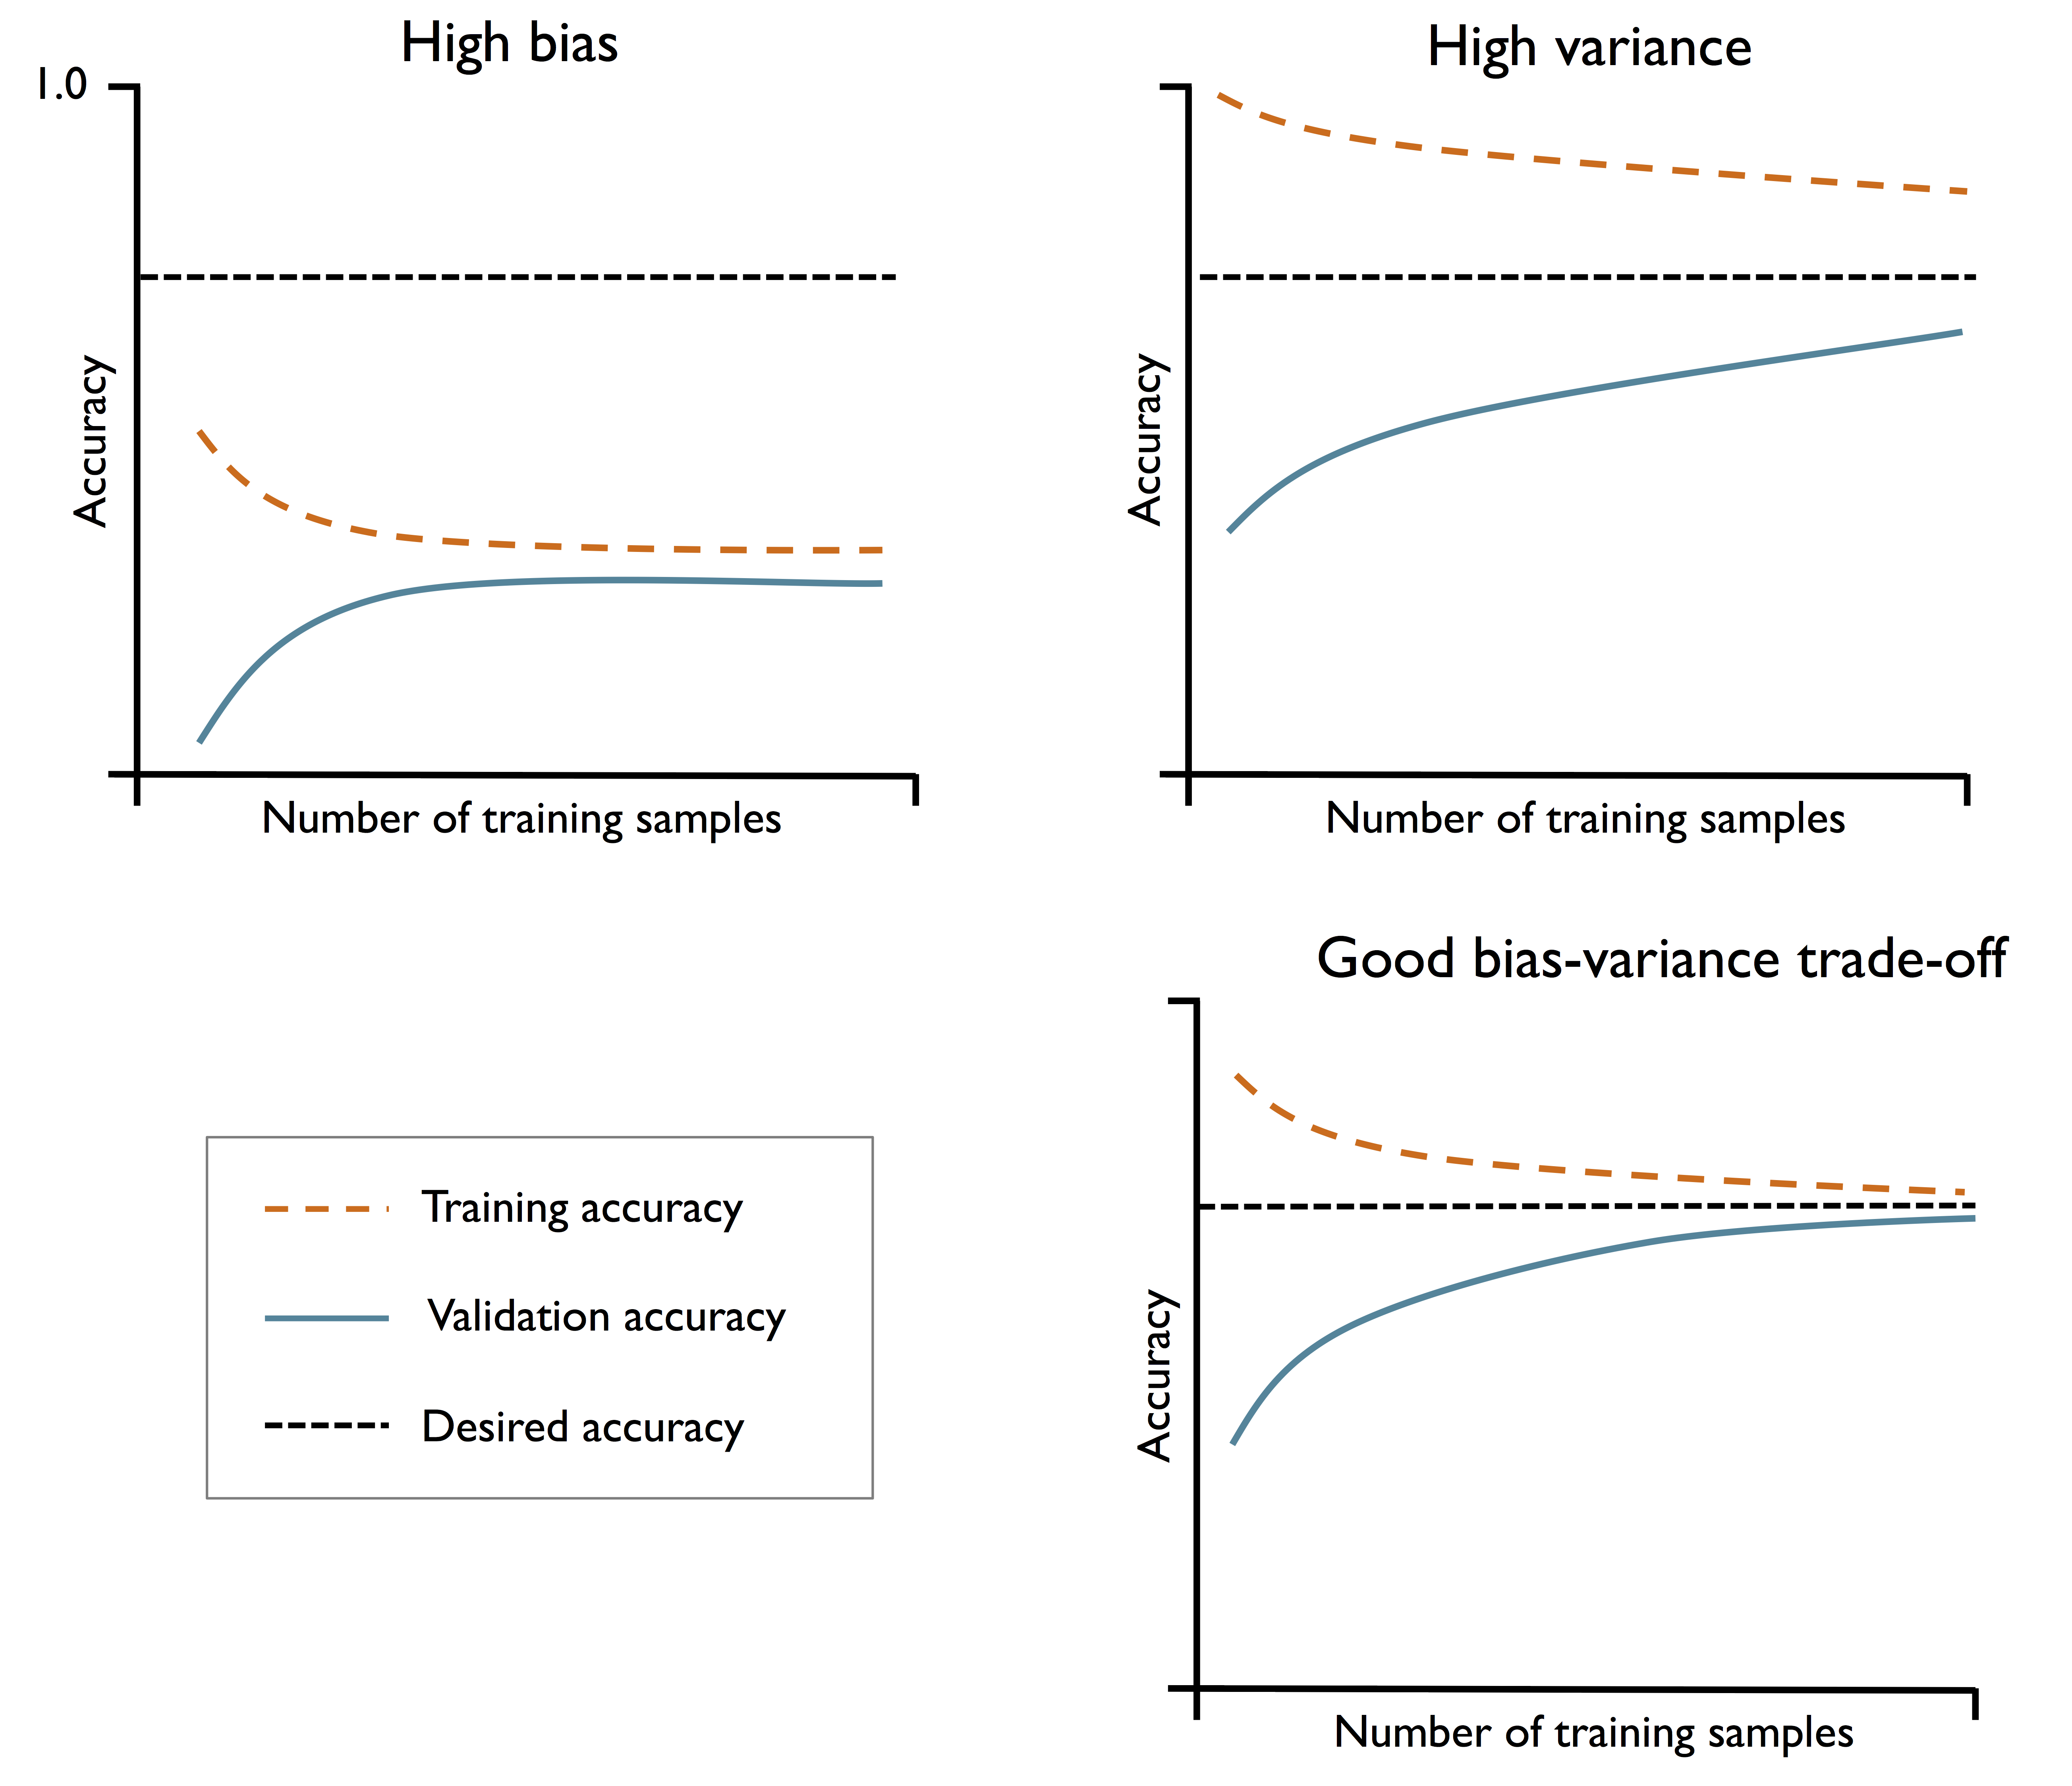

[`learning_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#) funzione di 
[`sklearn.model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
- [`linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) di Numpy per generare `10` punti tra `0.1` e `1.0`

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import  load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [20]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import learning_curve

clf = RidgeClassifier(random_state=42)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

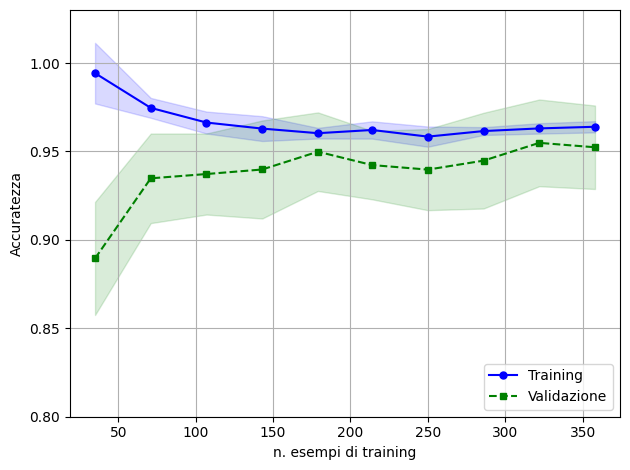

In [21]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', 
         markersize=5, label='Training')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', 
         marker='s', markersize=5, label='Validazione')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('n. esempi di training')
plt.ylabel('Accuratezza')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

#### Esercizi

- testare con altri modelli, dataset

## Curve di Validazione su Iperparametro

Uso di [`validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) e parametro `alpha` di [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)
- `alpha` float, default=`1.0` parametro di regolarizzazione; positivo (più grande $\to$ regolarizzazione più forte)


In [22]:
from sklearn.model_selection import validation_curve

param_range = [.00001, .0001, .001, .01, .1, 1., 10., 100., 1000]
train_scores, test_scores = validation_curve(
                estimator=clf, 
                X=X_train, 
                y=y_train, 
                param_name='alpha', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

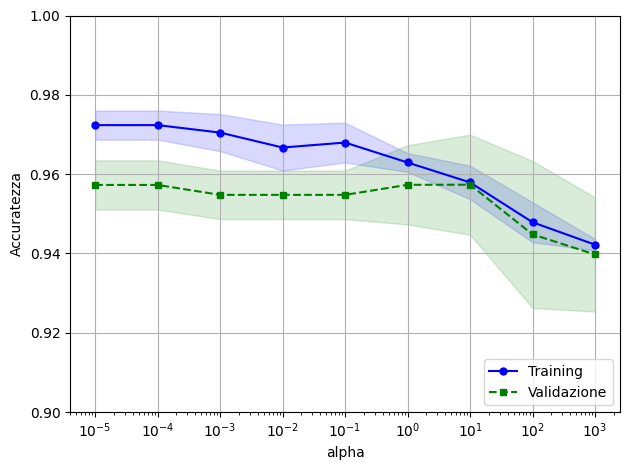

In [23]:
plt.plot(param_range, train_mean, color='blue', marker='o',  
         markersize=5, label='Training')
plt.fill_between(param_range, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--',  
         marker='s', markersize=5,  label='Validazione')
plt.fill_between(param_range, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('alpha')
plt.ylabel('Accuratezza')
plt.ylim([0.9, 1.])
plt.tight_layout()
plt.show()

- testare con altri metodi, parametri, dataset

## Curve


### Curva di validazione

[altri esempi nella [doc](https://scikit-learn.org/stable/modules/learning_curve.html#validation-curve)]


/home/nico/micromamba/lib/python3.12/site-packages/sklearn/utils/_plotting.py:102: RuntimeWarning: divide by zero encountered in scalar divide
  return diff.max() / diff.min()


Text(0.5, 1.0, 'Curva di validazione')

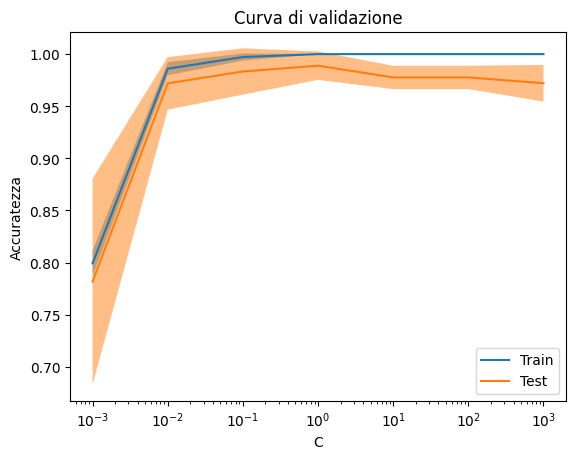

In [24]:
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

X, y = load_wine(return_X_y=True) 

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

disp = ValidationCurveDisplay.from_estimator(LogisticRegression(), X_std, y,
                                             param_name="C", 
                                             param_range=[0.001,0.01,0.1,1,10,100,100,1000],
                                             score_type="both", n_jobs=2, 
                                             score_name="Accuratezza",)
disp.ax_.set_title("Curva di validazione")

### Curva di apprendimento

[altri esempi nella [doc](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curve)]


**Esercizi**

Uso della CV (`cross_val_score`) per la selezione dei modelli al variare degli iperparametri

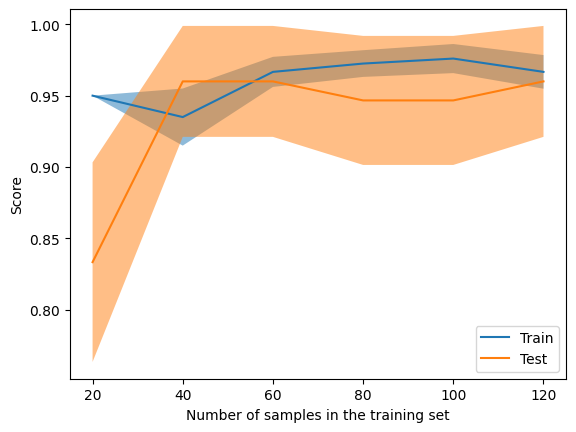

In [25]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.utils import shuffle
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

LearningCurveDisplay.from_estimator(LogisticRegression(), X_std, y, 
                                    train_sizes=[20, 40, 60, 80, 100, 120], cv=5,
                                   random_state=54)

Si veda la sezione _Cross-validation on diabetes Dataset Exercise_ 

nella [doc](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html)

## Classificazione e Regolarizzazione

cfr. blocco successivo 

### Esempio | applicazione alla Reg. Logistica

Per alcuni modelli in scikit-learn che supportino la regolarizzazione L1,<br> si imposta il parametro `penalty` a `'l1'` al fine di ottenere una soluzione *sparsa*:

In [26]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

Applicato ai dati di Wine standardizzati ...

In [27]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [28]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [29]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


array([[<Axes: title={'center': 'Class label'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic acid'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity of ash'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoid phenols'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color intensity'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'OD280/OD315 of diluted wines'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

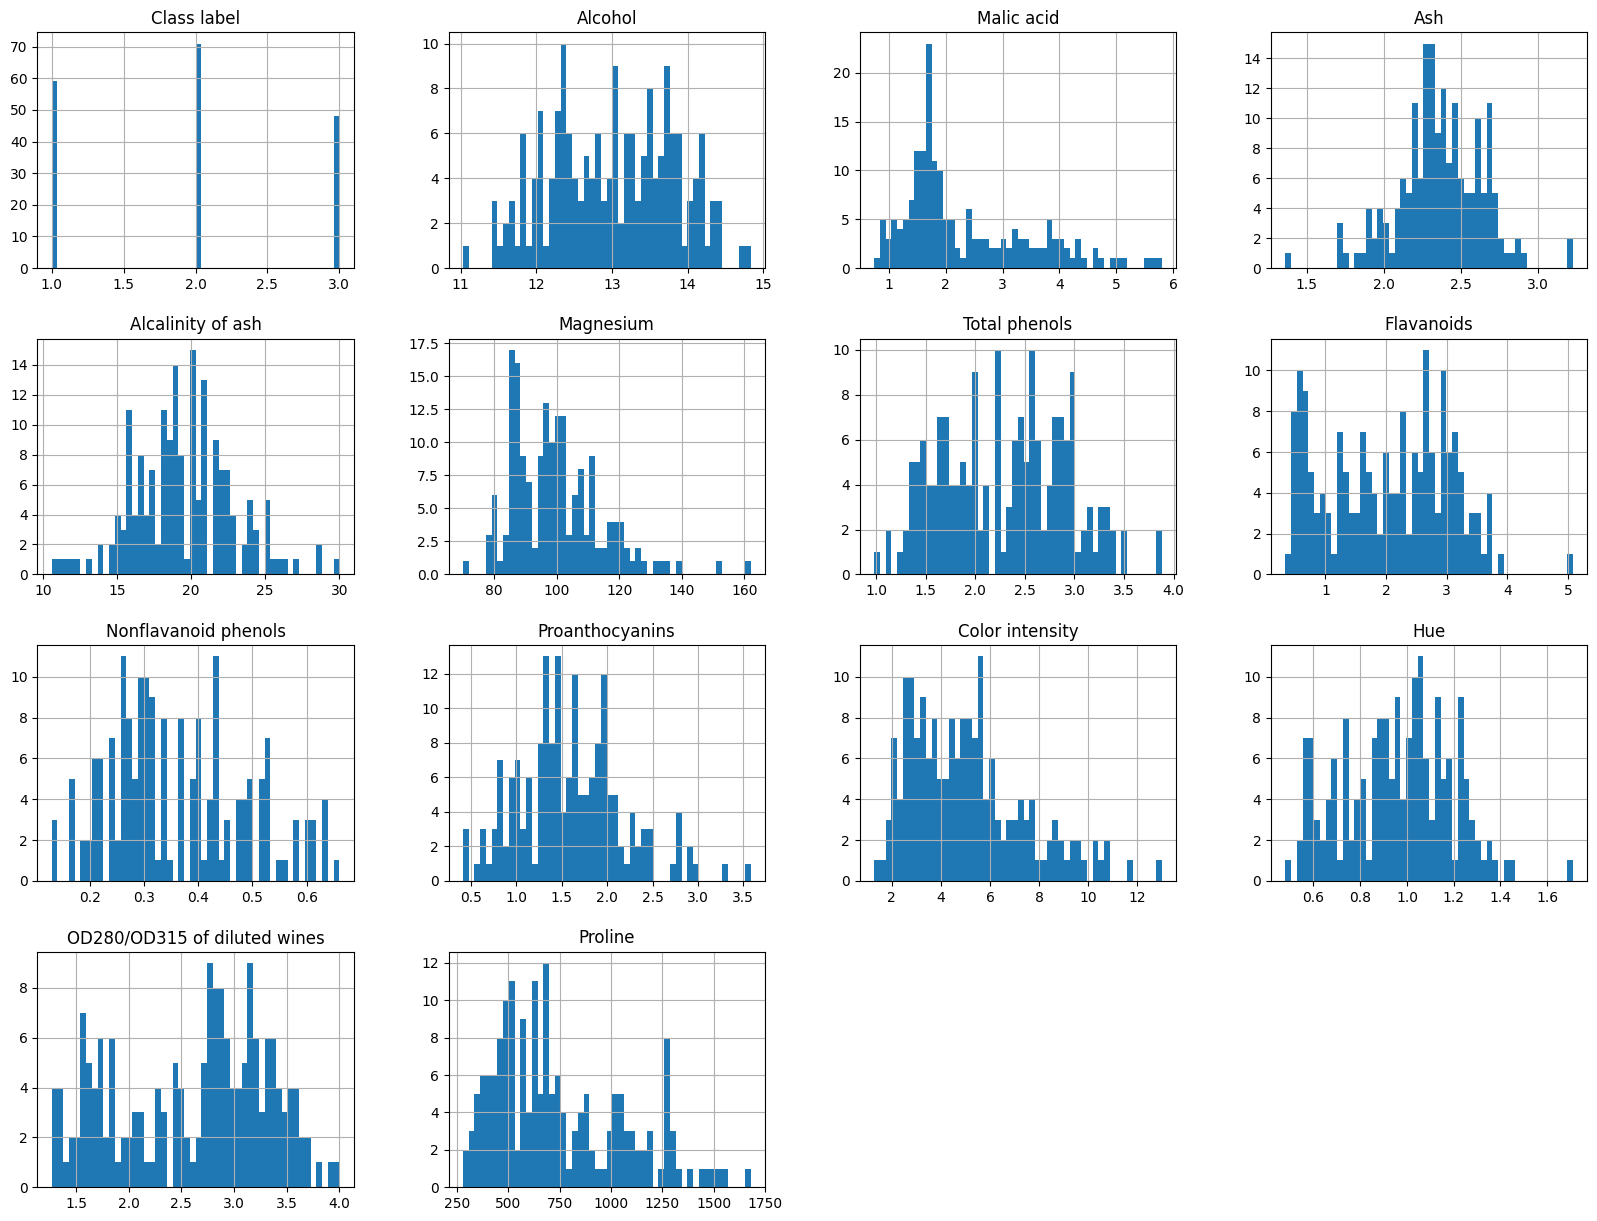

In [30]:
df_wine.hist(bins=50, figsize=(20,15))

In [31]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [32]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
# C=1.0 per default. Aumentare/diminuire il valore per una regolarizzazione più forte/debole
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9924812030075187
Test accuracy: 0.9777777777777777


In [34]:
print(lr.intercept_)

np.set_printoptions(8)
print(lr.coef_[lr.coef_!=0].shape)
print(lr.coef_)

[-1.47431345 -1.09760003 -2.31182008]
(23,)
[[ 1.38544760e+00  3.05785520e-01  7.91030339e-01 -1.32049143e+00
   0.00000000e+00  0.00000000e+00  1.23816731e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.24818261e-01
   1.99754721e+00]
 [-1.15379292e+00 -7.27858673e-01 -1.18251140e+00  4.77386608e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.85287369e-03
   2.88480160e-01 -2.34974439e+00  1.04219129e+00  0.00000000e+00
  -2.03949881e+00]
 [ 0.00000000e+00  4.50152574e-01  2.90363206e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.37987839e+00  0.00000000e+00
  -1.26333593e-02  1.82549948e+00 -1.10997590e+00 -1.02415276e-01
   0.00000000e+00]]


### Esempi | Training di Regressori

cfr. sezione: [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

dataset [diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) 
- già standardizzato

Regressione Lineare

In [35]:
# import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Uso di una sola feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
# Split in training/testing set
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# regressore lineare: creazione, addestramento, predizione
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)
# coefficienti ed MSE e R^2
print("Coefficienti:", regr.coef_, regr.intercept_)
print("MSE: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("R^2: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficienti: [938.23786125] 152.91886182616113
MSE: 2548.07
R^2: 0.47


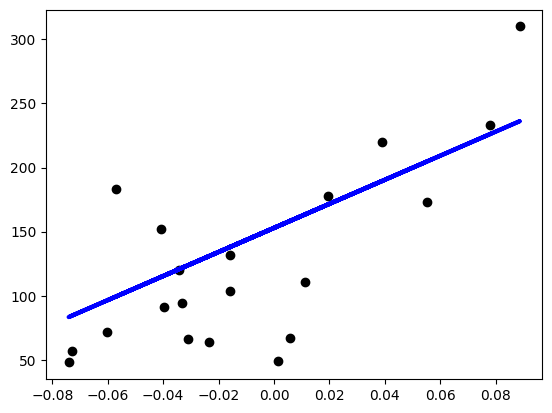

In [36]:
import matplotlib.pyplot as plt

# Plot
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X,y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
print('Coeff: ',reg.coef_, '\nintercetta:', reg.intercept_)

print('\nR^2: %.2f'%(reg.score(X_test, y_test))) # R^2 default 
y_pred = reg.predict(X_test)
print('MSE: %.2f'%(mean_squared_error(y_pred,y_test)))

Coeff:  [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105] 
intercetta: 151.00821291456543

R^2: 0.48
MSE: 2821.75


Altri esempi: _Plotting Cross-Validated Predictions_

cfr [doc](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html)

### Regressione: Regolarizzazione L1 e L2 

#### Interpretazione Geometrica della Regolarizzazione L2

<img src='https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch04/images/04_05.png' width=500> 

##### Ridge regression

$J(\mathbf{w})= \text{MSE}(\mathbf{w})+\alpha\dfrac{1}{2}\sum_i w_i^2$

[`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge) anche classi comprendenti la CV

In [38]:
from sklearn.linear_model import Ridge

X,y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(solver='lsqr', alpha=.1).fit(X_train, y_train)
print('RIDGE')
print('coeff: ',ridge.coef_)
print('intercetta: %.2f'%(ridge.intercept_))

print('\nR^2: %.2f'%(ridge.score(X_test, y_test)))
y_pred = ridge.predict(X_test)
print('MAE: %.2f'%(mean_absolute_error(y_pred,y_test)))

RIDGE
coeff:  [  39.68196187 -213.91436035  506.00973827  341.82678431 -108.70925854
  -71.04688729 -211.46690585  161.12370098  332.20476239   77.71347434]
intercetta: 151.05

R^2: 0.48
MAE: 41.85


#### Soluzioni Sparse con Regolarizzazione L1

<img src='https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch04/images/04_06.png' width=500> 

##### LASSO

$J(\mathbf{w}) = \text{MSE}(\mathbf{w}) + \alpha  \sum_i |w|_i =  \dfrac{1}{2N} \|y - \mathbf{Xw}\|^2_2 + \alpha  \|\mathbf{w}\|_1$

[`sklearn.linear_model.Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso)

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print('LASSO')
print('coeff: ',lasso.coef_)
print('intercetta: %.2f'%(lasso.intercept_))

print('\nR^2: %.2f'%(lasso.score(X_test, y_test)))
y_pred = lasso.predict(X_test)
print('MAE: %.2f'%(mean_absolute_error(y_pred,y_test)))

LASSO
coeff:  [   0.         -173.27107577  558.93812468  339.35373951  -58.72068535
   -0.         -274.11351588    0.          372.83897776   25.58680152]
intercetta: 151.07

R^2: 0.49
MAE: 41.94


##### Elastic-Net

[`sklearn.linear_model.ElasticNet`](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) Combina regolarizzazione L1 e L2

## Selezione Modelli (regressione)


### Over- e Underfitting

adattamento di un [esempio](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#) dalla doc di sklearn


In [40]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 5, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

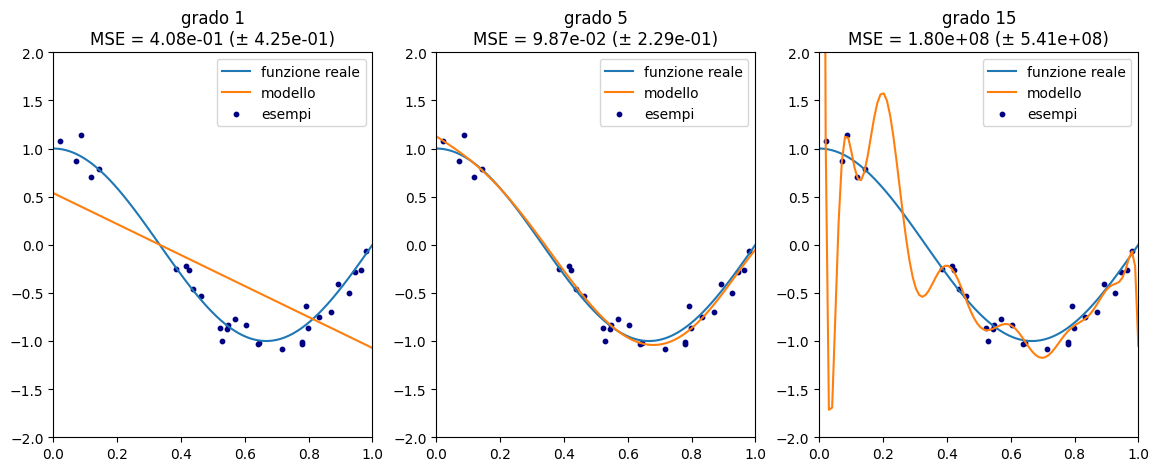

In [41]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)
    # valutazione modelli tramite CV 
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, true_fun(X_test), label="funzione reale")
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="modello")
    plt.scatter(X, y, s=10, label="esempi", color='navy')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("grado {}\nMSE = {:.2e} (± {:.2e})".format(degrees[i], -scores.mean(), scores.std()))